In [18]:
import glob
import cv2
import matplotlib.pyplot as plt

In [29]:
def read_one_image(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

images = [read_one_image(file) for file in glob.glob("./data/*.*")]

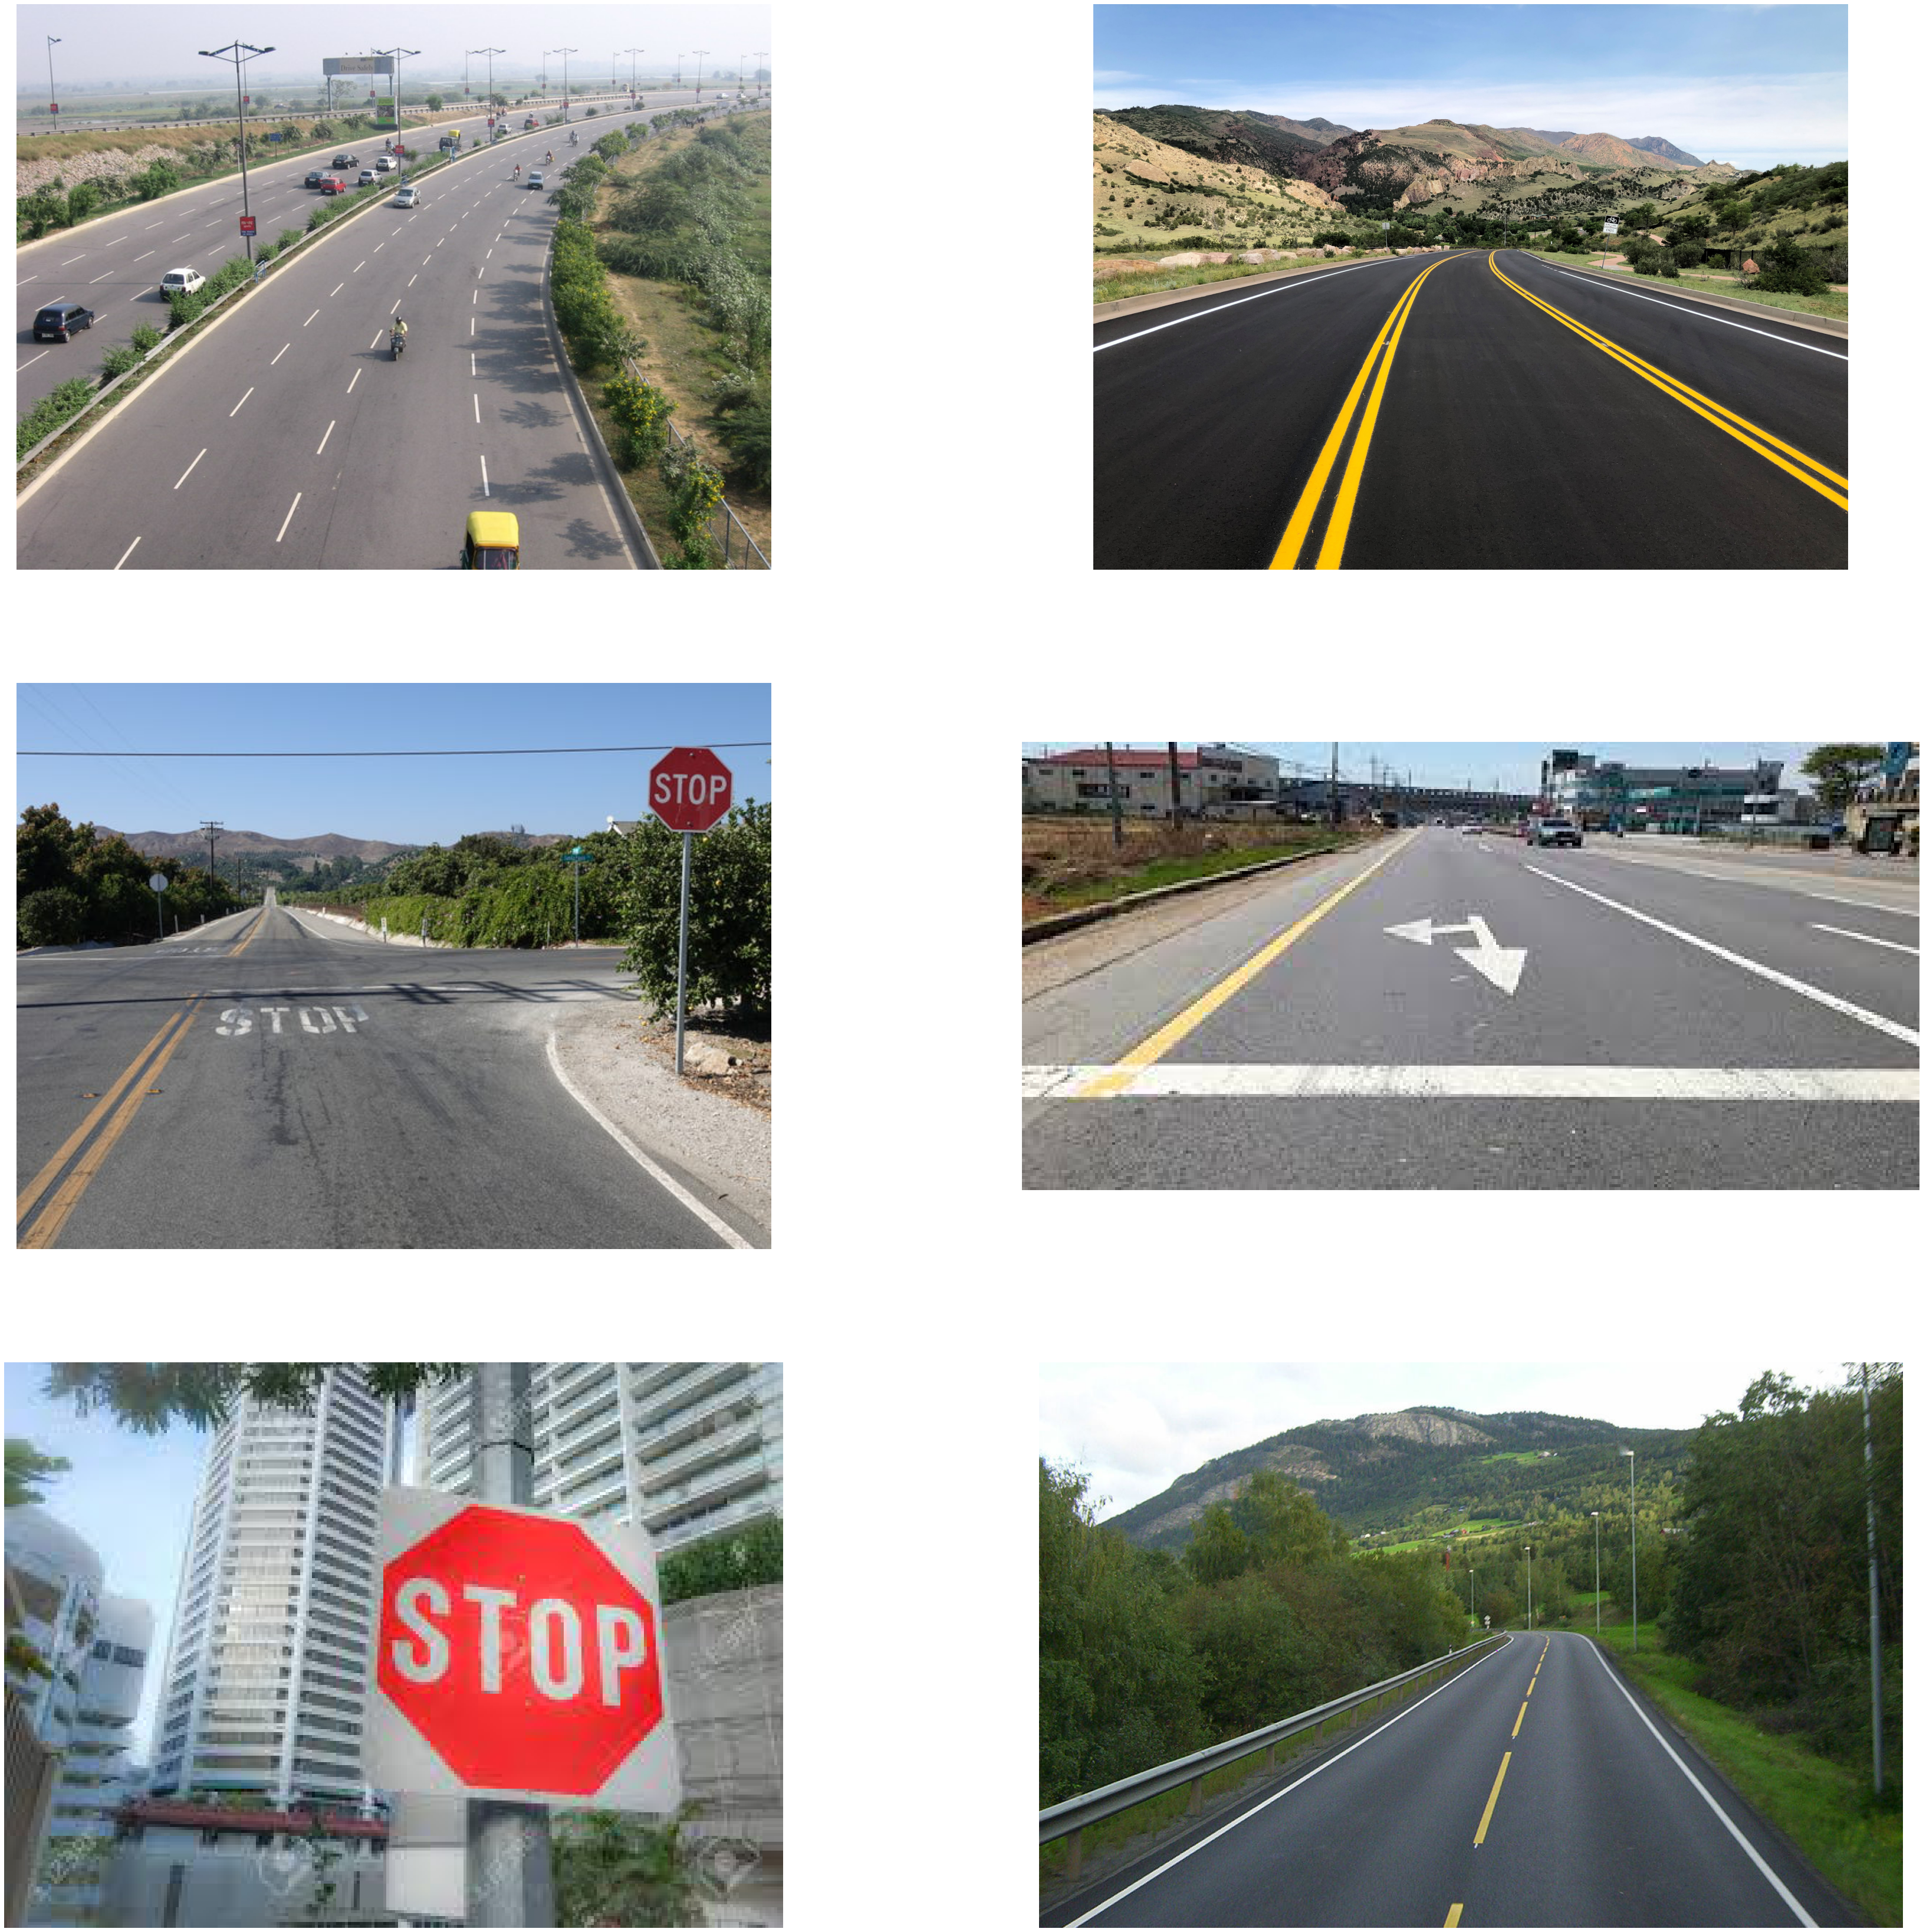

In [33]:

def show_images(images, cmap=None):
    subplot_rows = 3 if len(images) > 1 else 1
    subplot_cols = 2 if len(images) > 1 else 1
    plt.subplots(subplot_rows, subplot_cols, figsize=(60, 60))
    for i, img in enumerate(images):
        plt.subplot(subplot_rows, subplot_cols, i + 1)
        plt.axis("off")
        if cmap:
            plt.imshow(img, cmap)
        else:
            plt.imshow(img)

show_images(images)

In [21]:
def apply(images, fun, show=False, cmap=None, *args, **kwargs):
    new_images = [fun(img, *args, **kwargs) for img in images]
    if show:
        show_images(new_images, cmap)
    return new_images

In [ ]:

def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray_images = apply(images, gray_scale, cmap='gray')

In [ ]:
# def image_segmentation_using_k_means(image):
#     image = image.reshape((-1, 3))
#     image = np.float32(image)
#
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#     K = 3
#     attempts = 10
#
#     ret, label, center = cv2.kmeans(image, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
#     center = np.uint8(center)
#     res = center[label.flatten()]
#     result_image = res.reshape((image.shape))
#     return result_image
#
# #apply(images, image_segmentation_using_k_means)

In [ ]:
# def image_segmentation_using_contours(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     _, thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
#     edges = cv2.dilate(cv2.Canny(thresh, 0, 255), None)
#
#     cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
#     mask = np.zeros((256, 256), np.uint8)
#     masked = cv2.drawContours(mask, [cnt], -1, 255, -1)
#
#     dst = cv2.bitwise_and(image, image, mask=mask)
#     segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
#     return segmented
#
#
# apply(images, image_segmentation_using_contours)

In [ ]:
# def filter_image(image, mask):
#     r = image[:,:,0] * mask
#     g = image[:,:,1] * mask
#     b = image[:,:,2] * mask
#     return np.dstack([r,g,b])
#
# def image_segmentation_using_otsu(image):
#     gray_img = gray_scale(image)
#     thresh = threshold_otsu()
#     img_otsu  = gray_img < thresh
#     return filter_image(image, img_otsu)
#
# apply(images, image_segmentation_using_otsu)


In [ ]:
def image_segmentation_using_color_masking(image):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    delta_low = 40
    delta_high = 20
    low_color = (124 + delta_low, 118 + delta_low, 120 + delta_low)
    high_color = (69 - delta_high, 82 - delta_high, 90 - delta_high)

    mask = cv2.inRange(hsv_img, high_color, low_color)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result

In [ ]:
def gaussian_blurring(image, kernel):
    return cv2.GaussianBlur(image, kernel, cv2.BORDER_CONSTANT)

In [ ]:
def canny_edge_detection(image):
    return cv2.Canny(image, 100, 200)

In [ ]:
def crop_images(image, crop_ratio):
    curr_rows = image.shape[0]
    new_rows = int(curr_rows * crop_ratio)
    return image[new_rows:, :, :]

In [ ]:
def dilation(image, kernel, iterations):
    return cv2.dilate(image, kernel, iterations)

In [ ]:
# Pipeline
is_direct = False

if is_direct:
    new_images = apply(images, gaussian_blurring, show=False)
    new_images = apply(new_images, image_segmentation_using_color_masking, show=True)

else:
    new_images = apply(images, crop_images, crop_ratio=0.45)
    new_images = apply(new_images, gray_scale)
    new_images = apply(new_images, dilation, kernel=np.ones((7, 7), np.uint8), iterations=1)
    #new_images = apply(new_images, gaussian_blurring, kernel=(5,5))
    new_images = apply(new_images, canny_edge_detection)

    show_images(images, cmap='gray')
    show_images(new_images, cmap='gray')


    new_images = apply(images, crop_images, crop_ratio=0.45)
    new_images = apply(new_images, gray_scale)
    new_images = apply(new_images, dilation, kernel=np.ones((2, 2), np.uint8), iterations=1)
    #new_images = apply(new_images, gaussian_blurring, kernel=(5,5))
    new_images = apply(new_images, canny_edge_detection)

    show_images(new_images, cmap='gray')